In [1]:
import PIL.Image as Image
import numpy as np

import colorsys
import random

In [2]:
# Generate random colors:
random.seed(42)

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [3]:
colors = random_colors(20)
colors

[(1.0, 0.0, 0.3000000000000007),
 (0.5, 1.0, 0.0),
 (0.1999999999999993, 0.0, 1.0),
 (0.7999999999999998, 1.0, 0.0),
 (0.0, 1.0, 0.7000000000000002),
 (0.0, 0.09999999999999964, 1.0),
 (0.5, 0.0, 1.0),
 (1.0, 0.0, 0.5999999999999996),
 (0.20000000000000018, 1.0, 0.0),
 (0.0, 0.40000000000000036, 1.0),
 (1.0, 0.0, 0.9000000000000004),
 (0.0, 1.0, 1.0),
 (1.0, 0.30000000000000004, 0.0),
 (0.0, 0.6999999999999997, 1.0),
 (1.0, 0.6000000000000001, 0.0),
 (0.8000000000000007, 0.0, 1.0),
 (0.0, 1.0, 0.09999999999999964),
 (0.0, 1.0, 0.40000000000000036),
 (1.0, 0.0, 0.0),
 (1.0, 0.8999999999999999, 0.0)]

# Setting original image as background for annotated image and change the colors of the annotated image to make it look nice

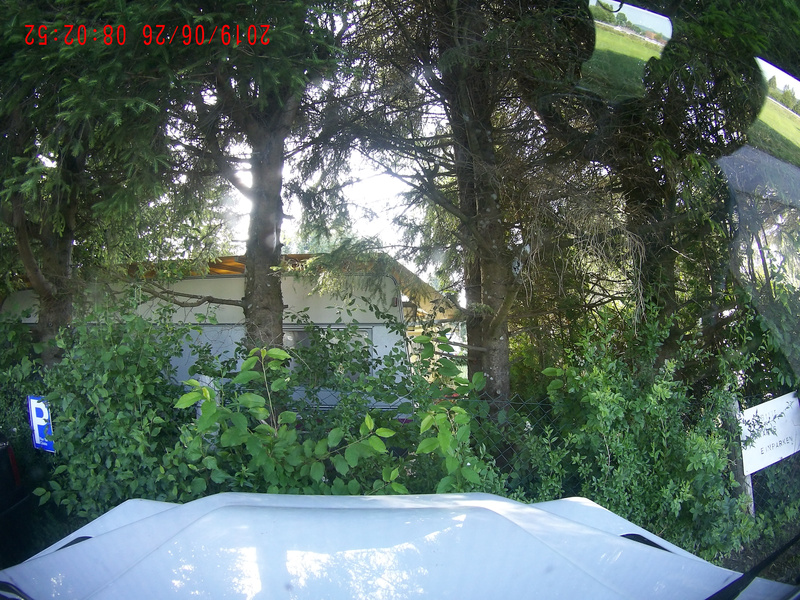

In [244]:
original_image = Image.open("/Users/benne/Downloads/HIDA-ufz_image_challenge/photos_annotated/2019_0626_080253_001.jpg.jpg")
original_image

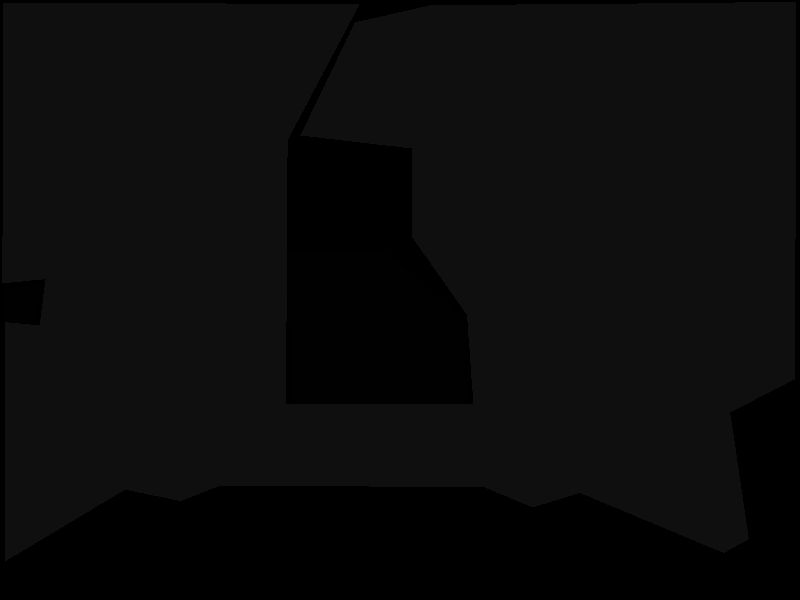

In [245]:
image_annotations = Image.open("/Users/benne/Downloads/HIDA-ufz_image_challenge/photos_annotated/2019_0626_080253_001.jpg.png").convert('RGB')
image_annotations

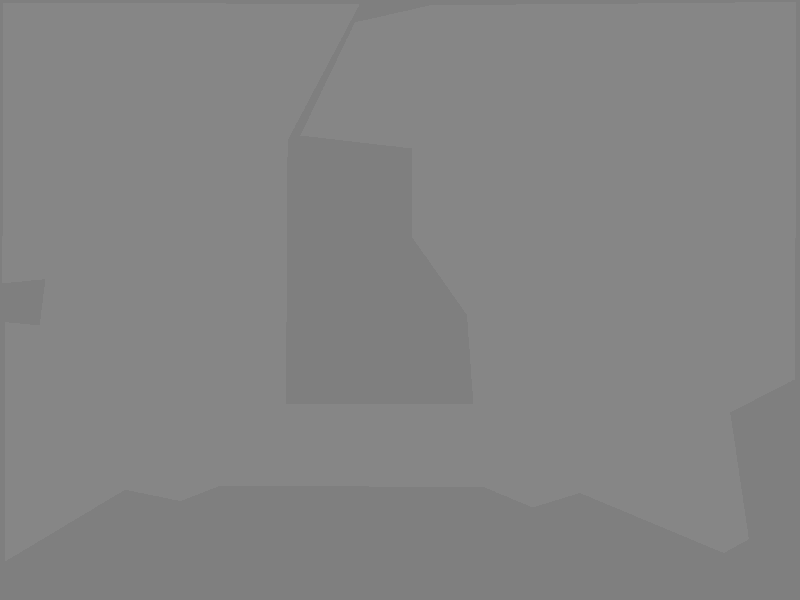

In [246]:
image_annotations.putalpha(alpha = 128)
image_annotations

In [247]:
np.array(image_annotations)

array([[[  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        ...,
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128]],

       [[  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        ...,
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128]],

       [[  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        ...,
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128]],

       ...,

       [[  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        ...,
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128]],

       [[  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        ...,
        [  0,   0,   0, 128],
        [  0,   0,   0, 128],
        [  0,   0,   0, 128]],

       [[  0

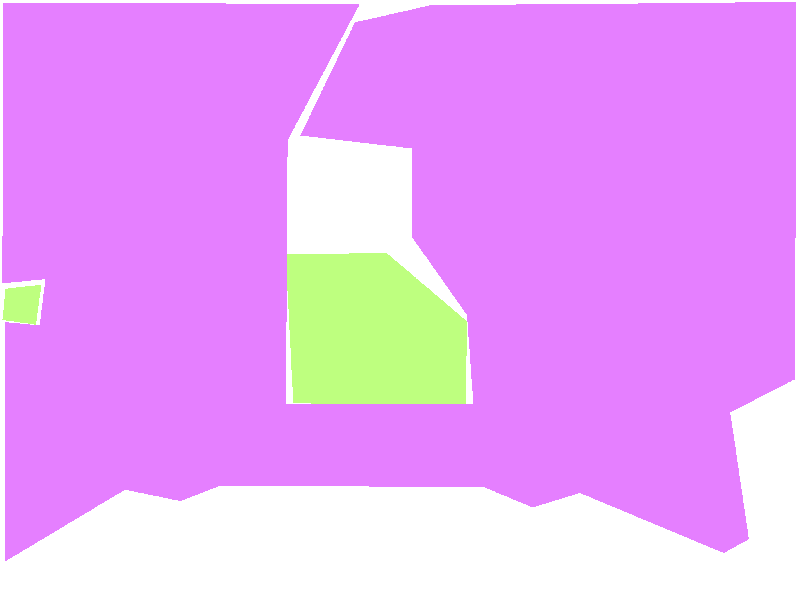

In [248]:
image_transformed = np.array(image_annotations)

height = np.array(image_annotations).shape[0]
width = np.array(image_annotations).shape[1]

image_transformed = image_transformed.reshape(height*width, 4)

# Make black pixels transparent:
image_transformed = [[0, 0, 0, 0]  if v == [0, 0, 0, 128] else v for v in image_transformed.tolist()]

# Resetting RGB ID's to nice colors:
for i in range(1,21) :
    r = colors
    image_transformed = [[colors[i][0]*255, colors[i][1]*255, colors[i][2]*255, 128]  if v == [i, i, i, 128] else v for v in image_transformed]


#Reshape and make it Image type again
image_transformed = np.array(image_transformed, dtype = 'uint8')
image_transformed = image_transformed.reshape(height, width, 4)
Image.fromarray(image_transformed, mode = 'RGBA')#.save(os.path.join(folder, filename), "PNG")

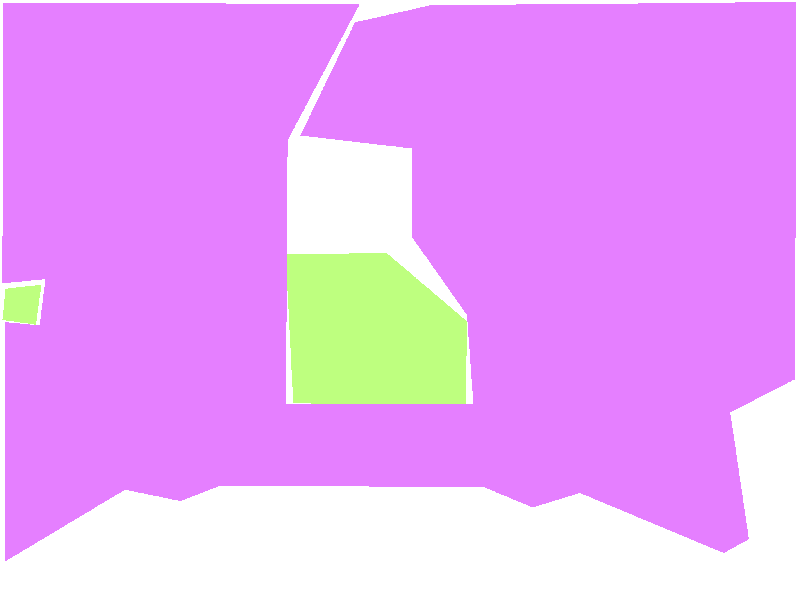

In [249]:
Image.fromarray(image_transformed)

In [250]:
#Put original image in the background

img = Image.fromarray(image_transformed)
background = original_image
background.putalpha(alpha = 255)
background.paste(img, (0, 0), img)

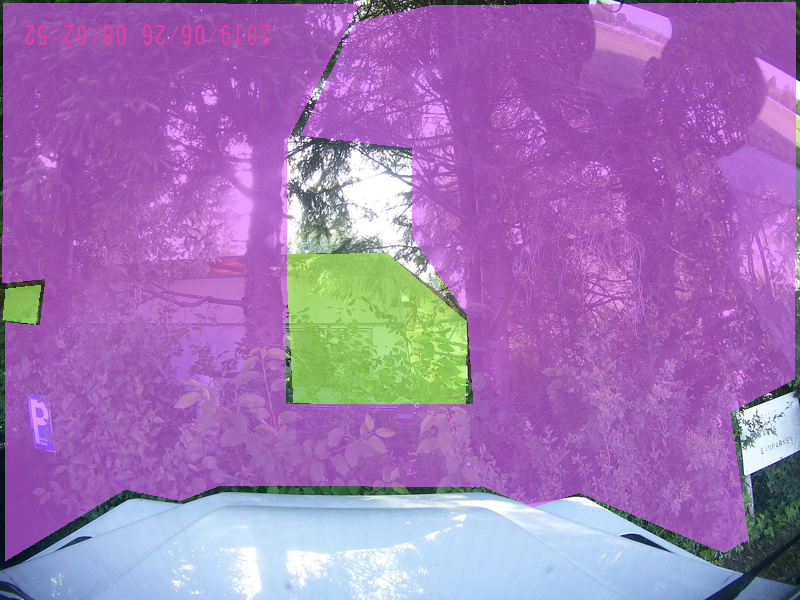

In [251]:
background

# Do the counting stuff

In [252]:
import pandas as pd

In [253]:
rgb_ids = pd.read_csv("/Users/benne/Downloads/HIDA-ufz_image_challenge/features_legend.csv")

In [254]:
rgb_ids

,id_rgb,id_polygon,label
0,1,1361294,building
1,2,1361622,housenumber
2,3,1361612,blackstripe
3,4,1361613,paved
4,5,1361620,person
5,6,1361621,licence
6,7,1344856,Multi-laneroad
7,8,1344863,Forest
8,9,1344905,dirtroad
9,10,1344908,lawn


In [255]:
image_annotations = Image.open("/Users/benne/Downloads/HIDA-ufz_image_challenge/photos_annotated/2019_0626_080253_001.jpg.png").convert('RGB')
image_annotations = np.array(image_annotations)
height = np.array(image_annotations).shape[0]
width = np.array(image_annotations).shape[1]

image_for_counting = image_annotations.reshape(height*width, 3).tolist()

In [256]:
image_for_counting.count([0, 0, 0])/(height*width)

0.22534375

In [257]:
rgb_ids['percentage'] = 0
for i in range(1, 21):
    rgb_ids['percentage'][rgb_ids['id_rgb'] == i] = (image_for_counting.count([i, i, i])/(height*width))*100

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [258]:
rgb_ids

,id_rgb,id_polygon,label,percentage
0,1,1361294,building,5.240625
1,2,1361622,housenumber,0.000000
2,3,1361612,blackstripe,0.000000
3,4,1361613,paved,0.000000
4,5,1361620,person,0.000000
5,6,1361621,licence,0.000000
6,7,1344856,Multi-laneroad,0.000000
7,8,1344863,Forest,0.000000
8,9,1344905,dirtroad,0.000000
9,10,1344908,lawn,0.000000


In [259]:
dataframe_for_writing = rgb_ids[rgb_ids['percentage'] > 0]
dataframe_for_writing

,id_rgb,id_polygon,label,percentage
0,1,1361294,building,5.240625
14,15,1349359,Tree,72.225000


# Write it on the image

In [260]:
from PIL import Image, ImageFont, ImageDraw 

#Select Arial as font
title_font = ImageFont.truetype(r'C:\Users\System-Pc\Desktop\arial.ttf', 20)

for i in range(0, dataframe_for_writing.shape[0]):
    title_text = f"{dataframe_for_writing[' label'].iloc[i]}: {round(dataframe_for_writing['percentage'].iloc[i], 2)}%"

    image_editable = ImageDraw.Draw(background)
    image_editable.text((15,15 + i*25), title_text, (0, 0, 0), font=title_font)

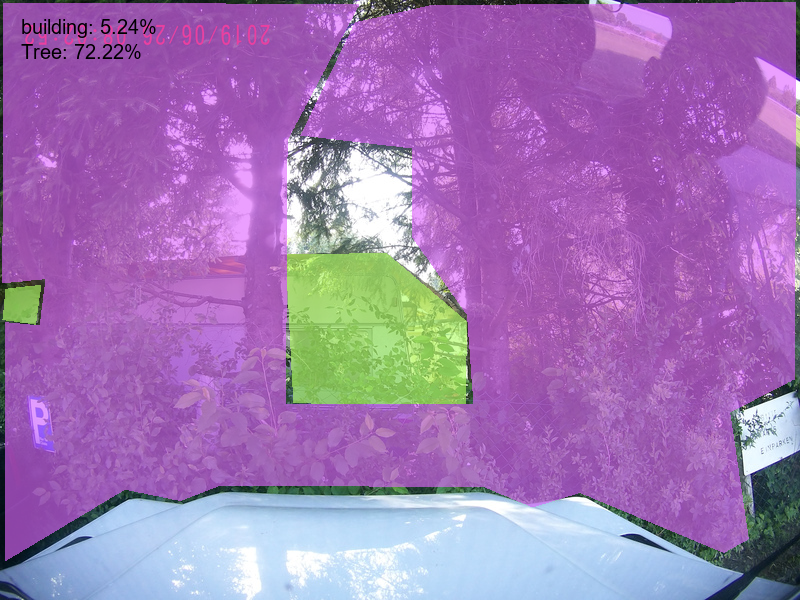

In [261]:
background